In [94]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


In [95]:
from keras_preprocessing.image import ImageDataGenerator


In [96]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=r".//Dataset",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(28,28),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory=r".//Dataset",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(28,28),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False
)

Found 314 files belonging to 36 classes.
Using 252 files for training.
Found 314 files belonging to 36 classes.
Using 62 files for validation.


In [97]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [98]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [99]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [100]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(28,28,3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break




(32, 28, 28, 3)
(32, 36)


In [115]:
normalization_layer = keras.layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

num_classes = 36

model = keras.Sequential([
    data_augmentation,
    keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(28, 28, 3)),
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes)
])



model.compile(optimizer="adam", loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

model.summary()

epochs=80
history = model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(epochs)




Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (None, 28, 28, 3)         0         
                                                                 
 rescaling_13 (Rescaling)    (None, 28, 28, 3)         0         
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                

In [102]:
from imutils import paths

src_test  = "E:\SatdatRapi\Test"
test_imagePaths = list(paths.list_images(src_test))

test_imagePaths

['E:\\SatdatRapi\\Test\\DataTest1.png',
 'E:\\SatdatRapi\\Test\\DataTest10.png',
 'E:\\SatdatRapi\\Test\\DataTest100.png',
 'E:\\SatdatRapi\\Test\\DataTest11.png',
 'E:\\SatdatRapi\\Test\\DataTest12.png',
 'E:\\SatdatRapi\\Test\\DataTest13.png',
 'E:\\SatdatRapi\\Test\\DataTest14.png',
 'E:\\SatdatRapi\\Test\\DataTest15.png',
 'E:\\SatdatRapi\\Test\\DataTest16.png',
 'E:\\SatdatRapi\\Test\\DataTest17.png',
 'E:\\SatdatRapi\\Test\\DataTest18.png',
 'E:\\SatdatRapi\\Test\\DataTest19.png',
 'E:\\SatdatRapi\\Test\\DataTest2.png',
 'E:\\SatdatRapi\\Test\\DataTest20.png',
 'E:\\SatdatRapi\\Test\\DataTest21.png',
 'E:\\SatdatRapi\\Test\\DataTest22.png',
 'E:\\SatdatRapi\\Test\\DataTest23.png',
 'E:\\SatdatRapi\\Test\\DataTest24.png',
 'E:\\SatdatRapi\\Test\\DataTest25.png',
 'E:\\SatdatRapi\\Test\\DataTest26.png',
 'E:\\SatdatRapi\\Test\\DataTest27.png',
 'E:\\SatdatRapi\\Test\\DataTest28.png',
 'E:\\SatdatRapi\\Test\\DataTest29.png',
 'E:\\SatdatRapi\\Test\\DataTest3.png',
 'E:\\SatdatRapi\\

TOLONG JANGAN DIHAPUS

In [103]:
# def noise_removal(image) :
#     import numpy as np
#     kernel = np.ones((1,1), np.uint8)
#     image = cv2.dilate(image, kernel, iterations=3)
#     kernel = np.ones((1,1), np.uint8)
#     image = cv2.erode(image, kernel, iterations=3)
#     image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
#     image = cv2.medianBlur(image, 3)
#     return image

In [104]:
# #kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
# def sharpening(image, kernel) :
#     kernel = kernel
#     image = cv2.filter2D(image, -1, kernel)
#     return image

In [105]:
# def grayscale(image):
#     return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [106]:
# thresholding uisng adaptive mean


In [107]:
# for imagePath in test_imagePaths:
#     image = cv2.imread(imagePath)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
#     cv2.imwrite(imagePath, image)


In [108]:
# import numpy as np
# import cv2

# # Match contours to license plate or character template
# def find_contours(dimensions, img) :

#     # Find all contours in the image
#     cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#     # Retrieve potential dimensions
#     lower_width = dimensions[0]
#     upper_width = dimensions[1]
#     lower_height = dimensions[2]
#     upper_height = dimensions[3]

#     # Check largest 5 or  15 contours for license plate or character respectively
#     cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]

#     ii = cv2.imread('contour.jpg')

#     x_cntr_list = []
#     target_contours = []
#     img_res = []
#     for cntr in cntrs :
#         #detects contour in binary image and returns the coordinates of rectangle enclosing it
#         intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)

#         #checking the dimensions of the contour to filter out the characters by contour's size
#         if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
#             x_cntr_list.append(intX) #stores the x coordinate of the character's contour, to used later for indexing the contours

#             char_copy = np.zeros((44,24))
#             #extracting each character using the enclosing rectangle's coordinates.
#             char = img[intY:intY+intHeight, intX:intX+intWidth]
#             char = cv2.resize(char, (20, 40))

#             cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)
#             plt.imshow(ii, cmap='gray')

#             #             Make result formatted for classification: invert colors
#             char = cv2.subtract(255, char)

#             # Resize the image to 24x44 with black border
#             char_copy[2:42, 2:22] = char
#             char_copy[0:2, :] = 0
#             char_copy[:, 0:2] = 0
#             char_copy[42:44, :] = 0
#             char_copy[:, 22:24] = 0

#             img_res.append(char_copy) #List that stores the character's binary image (unsorted)

#     #Return characters on ascending order with respect to the x-coordinate (most-left character first)

#     plt.show()
#     #arbitrary function that stores sorted list of character indeces
#     indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
#     img_res_copy = []
#     for idx in indices:
#         img_res_copy.append(img_res[idx])# stores character images according to their index
#     img_res = np.array(img_res_copy)

#     return img_res

In [109]:

# def segment_characters(image) :

#     # Preprocess cropped license plate image
#     img_lp = cv2.resize(image, (300, 100))
#     img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
#     _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#     img_binary_lp = cv2.erode(img_binary_lp, (3,3))
#     img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

#     LP_WIDTH = img_binary_lp.shape[0]
#     LP_HEIGHT = img_binary_lp.shape[1]

#     # Make borders white
#     img_binary_lp[0:3,:] = 255
#     img_binary_lp[:,0:3] = 255
#     img_binary_lp[72:75,:] = 255
#     img_binary_lp[:,330:333] = 255

#     # Estimations of character contours sizes of cropped license plates
#     dimensions = [LP_WIDTH/6,
#                        LP_WIDTH/2,
#                        LP_HEIGHT/10,
#                        2*LP_HEIGHT/3]   
#     plt.imshow(img_binary_lp, cmap='gray')
#     plt.show()
#     cv2.imwrite('contour.jpg',img_binary_lp)

#     # Get contours within cropped license plate
#     char_list = find_contours(dimensions, img_binary_lp)

#     return char_list


In [110]:
# import cv2
# image_test = "E:\SatdatRapi\Test_2\DataTest89.png"
# img = cv2.imread(image_test)
# char = segment_characters(img)


In [111]:
# for i in range(10):
#     plt.subplot(1, 10, i+1)
#     plt.imshow(char[i], cmap='gray')
#     plt.axis('off')

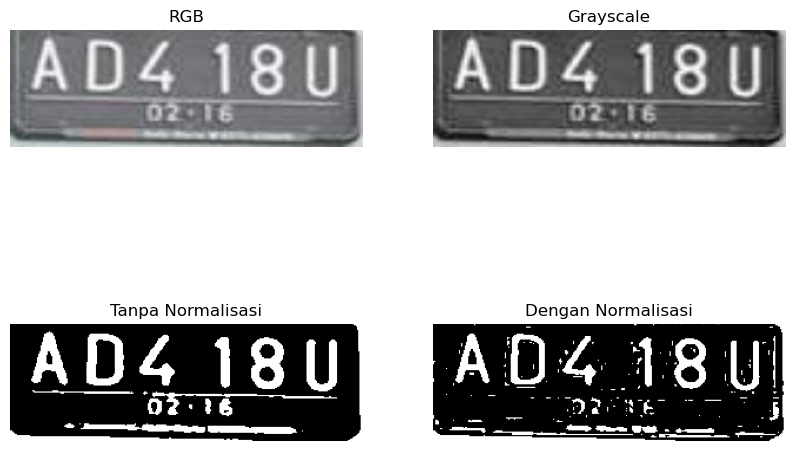

In [120]:
img = cv.imread("E:\SatdatRapi\Test_2\DataTest89.png")

# resize citra dengan mengalikannya ukuran aslinya dengan 0.4
# contoh: 1920 x 2560 ==> 1920 x 0.4 = 768 ; 2560 x 0.4 = 1024 ==> hasilnya 768 x 1024
# img.shape[1] = kolom/lebar ; img.shape[0] = baris/tinggi
img = cv.resize(img, (300,100))

# konversi dari BGR ke grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # convert bgr to grayscale

# Normalisasi Cahaya
# citra kendaraan memiliki intensitas cahaya yang berbeda-beda maka normalkan terlebih dahulu
# cara menormalkan intensitas cahaya: 
# 1. lakukan operasi opening di citra gray
# 2. lakukan pengurangan citra gray dengan citra hasil opening
# 3. citra hasil normalisasi bisa diubah ke citra BW (hitam putih) dengan pengambangan Otsu

# buat kernel dengan bentuk ellipse, diameter 20 piksel
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(20,20))

# Normalisasi cahaya (1) 
# lakukan operasi opening ke citra grayscale dengan kernel yang sudah dibuat (var: kernel)
img_opening = cv.morphologyEx(img_gray, cv.MORPH_OPEN, kernel)

# Normalisasi cahaya (2)
# lakukan pengurangan citra grayscale dengan citra hasil opening
img_norm = img_gray - img_opening

# Normalisasi cahaya (3)
# konversi citra hasil normalisasi ke citra BW (hitam putih)
(thresh, img_norm_bw) = cv.threshold(img_norm, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# ==== Cek normalisasi START ====
# Untuk ngecek hasil sebelum dan sesudah dilakukan normalisasi
# Bisa di comment/uncomment

# buat citra bw tanpa normalisasi
(thresh, img_without_norm_bw) = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

fig = plt.figure(figsize=(10, 7)) 
row_fig = 2
column_fig = 2

fig.add_subplot(row_fig, column_fig, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("RGB")

fig.add_subplot(row_fig, column_fig, 2)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.title("Grayscale")

fig.add_subplot(row_fig, column_fig, 3)
plt.imshow(img_without_norm_bw, cmap='gray')
plt.axis('off')
plt.title("Tanpa Normalisasi")

fig.add_subplot(row_fig, column_fig, 4)
plt.imshow(img_norm_bw, cmap='gray')
plt.axis('off')
plt.title("Dengan Normalisasi")

plt.show()

In [ ]:
def segment_characters(image) :

    # Preprocess cropped license plate image
    img_lp = cv2.resize(image, (300, 100))
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
    _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]

    # Make borders white
    img_binary_lp[0:3,:] = 255
    img_binary_lp[:,0:3] = 255
    img_binary_lp[72:75,:] = 255
    img_binary_lp[:,330:333] = 255

    # Estimations of character contours sizes of cropped license plates
    dimensions = [LP_WIDTH/6,
                       LP_WIDTH/2,
                       LP_HEIGHT/10,
                       2*LP_HEIGHT/3]   
    plt.imshow(img_binary_lp, cmap='gray')
    plt.show()
    cv2.imwrite('contour.jpg',img_binary_lp)

    # Get contours within cropped license plate
    char_list = find_contours(dimensions, img_binary_lp)

    return char_list

In [122]:

char = segment_characters(img_norm_bw)

error: OpenCV(4.7.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x981fb336::Set<1,-1,-1>,struct cv::impl::A0x981fb336::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [112]:
def fix_dimension(img):
    new_img = np.zeros((28,28,3))
    for i in range(3):
        new_img[:,:,i] = img
    return new_img

def show_results():
    dic = {}
    characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for i,c in enumerate(characters):
        dic[i] = c

    output = []
    for i,ch in enumerate(char): #iterating over the characters
        img_ = cv2.resize(ch, (28,28))
        img = fix_dimension(img_)
        img = img.reshape(1,28,28,3) #preparing image for the model
        y = model.predict(img)
        y_pred = np.argmax(y) #predicting the class
        character = dic[y_pred] #get the classs
        output.append(character) #storing the result in a list

    plate_number = ''.join(output)
    return plate_number

print(show_results())

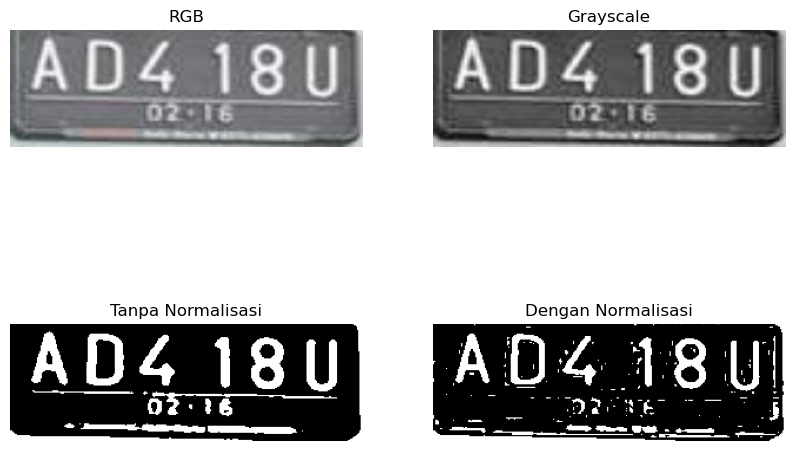

Plat nomor tidak ditemukan


NameError: name 'img_plate_gray' is not defined

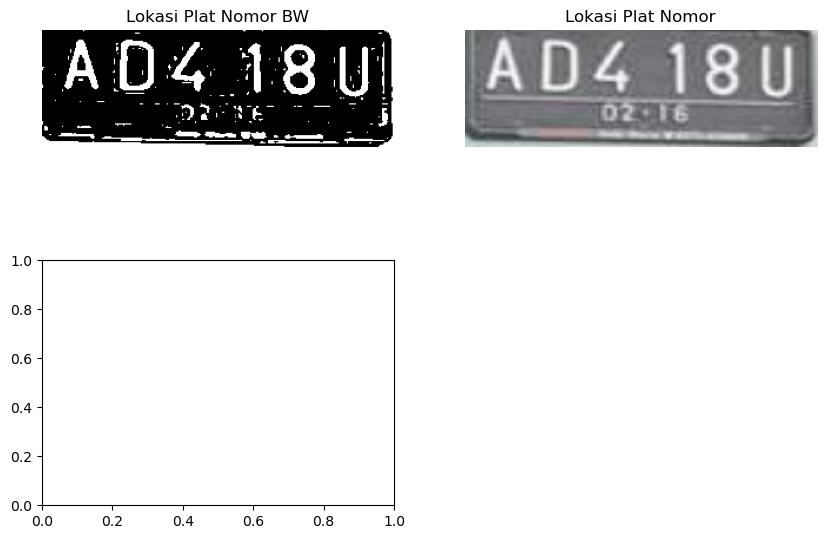

In [118]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras

#
# Author: Irfan Muhammad Ghani
# Update : 4/3/2021
#
#---------------------------------------------------------------
# █▀▀█ █▀▀█ █▀▀█ █▀▀█ █▀▀ █▀▀▄ █▀▀▀ █▀▀█ █░░ █▀▀█ █░░█ █▀▀█ █▀▀▄ 
# █░░█ █▄▄▀ █▄▄█ █░░█ █▀▀ █░░█ █░▀█ █░░█ █░░ █▄▄█ █▀▀█ █▄▄█ █░░█ 
# █▀▀▀ ▀░▀▀ ▀░░▀ █▀▀▀ ▀▀▀ ▀░░▀ ▀▀▀▀ ▀▀▀▀ ▀▀▀ ▀░░▀ ▀░░▀ ▀░░▀ ▀░░▀
#---------------------------------------------------------------

# load citra RGB (BGR)
img = cv.imread("E:\SatdatRapi\Test_2\DataTest89.png")

# resize citra dengan mengalikannya ukuran aslinya dengan 0.4
# contoh: 1920 x 2560 ==> 1920 x 0.4 = 768 ; 2560 x 0.4 = 1024 ==> hasilnya 768 x 1024
# img.shape[1] = kolom/lebar ; img.shape[0] = baris/tinggi
img = cv.resize(img, (300,100))

# konversi dari BGR ke grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # convert bgr to grayscale

# Normalisasi Cahaya
# citra kendaraan memiliki intensitas cahaya yang berbeda-beda maka normalkan terlebih dahulu
# cara menormalkan intensitas cahaya: 
# 1. lakukan operasi opening di citra gray
# 2. lakukan pengurangan citra gray dengan citra hasil opening
# 3. citra hasil normalisasi bisa diubah ke citra BW (hitam putih) dengan pengambangan Otsu

# buat kernel dengan bentuk ellipse, diameter 20 piksel
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(20,20))

# Normalisasi cahaya (1) 
# lakukan operasi opening ke citra grayscale dengan kernel yang sudah dibuat (var: kernel)
img_opening = cv.morphologyEx(img_gray, cv.MORPH_OPEN, kernel)

# Normalisasi cahaya (2)
# lakukan pengurangan citra grayscale dengan citra hasil opening
img_norm = img_gray - img_opening

# Normalisasi cahaya (3)
# konversi citra hasil normalisasi ke citra BW (hitam putih)
(thresh, img_norm_bw) = cv.threshold(img_norm, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# ==== Cek normalisasi START ====
# Untuk ngecek hasil sebelum dan sesudah dilakukan normalisasi
# Bisa di comment/uncomment

# buat citra bw tanpa normalisasi
(thresh, img_without_norm_bw) = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

fig = plt.figure(figsize=(10, 7)) 
row_fig = 2
column_fig = 2

fig.add_subplot(row_fig, column_fig, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("RGB")

fig.add_subplot(row_fig, column_fig, 2)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.title("Grayscale")

fig.add_subplot(row_fig, column_fig, 3)
plt.imshow(img_without_norm_bw, cmap='gray')
plt.axis('off')
plt.title("Tanpa Normalisasi")

fig.add_subplot(row_fig, column_fig, 4)
plt.imshow(img_norm_bw, cmap='gray')
plt.axis('off')
plt.title("Dengan Normalisasi")

plt.show()

# ==== Cek normalisasi FINISH ====

#------------------------------------------------------
# █▀▀▄ █▀▀ ▀▀█▀▀ █▀▀ █░█ █▀▀ ░▀░ 　 █▀▀█ █░░ █▀▀█ ▀▀█▀▀ 
# █░░█ █▀▀ ░░█░░ █▀▀ █▀▄ ▀▀█ ▀█▀ 　 █░░█ █░░ █▄▄█ ░░█░░ 
# ▀▀▀░ ▀▀▀ ░░▀░░ ▀▀▀ ▀░▀ ▀▀▀ ▀▀▀ 　 █▀▀▀ ▀▀▀ ▀░░▀ ░░▀░░
#------------------------------------------------------

# Deteksi plat menggunakan contours

# dapatkan contours dari citra kendaraan
contours_vehicle, hierarchy = cv.findContours(img_norm_bw, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) # get the contour for every area

# cek jumlah contours
# print(len(contours))

# index contour yang berisi kandidat plat nomor
index_plate_candidate = []

# index counter dari setiap contour di contours_vehichle
index_counter_contour_vehicle = 0

# filter setiap contour untuk mendapatkan kandidat plat nomor
for contour_vehicle in contours_vehicle:
    
    # dapatkan posisi x, y, nilai width, height, dari contour
    x,y,w,h = cv.boundingRect(contour_vehicle)

    # dapatkan nilai aspect rationya
    aspect_ratio = w/h

    # dapatkan kandidat plat nomornya apabila:
    # 1. lebar piksel lebih dari atau sama dengan 200 piksel
    # 2. aspect rationya kurang dari atau sama dengan 4
    if w >= 200 and aspect_ratio <= 4 : 
        
        # dapatkan index kandidat plat nomornya
        index_plate_candidate.append(index_counter_contour_vehicle)
    
    # increment index counter dari contour
    index_counter_contour_vehicle += 1

# Dapatkan lokasi plat nomornya:
#   berdasarkan eksperimen, kita bisa mendapatkan satu atau dua lokasi plat
#   jika mendapatkan dua lokasi plat, berdasarkan observasi, pilih plat kedua karena ukurannya yang lebih pas
#

# buat duplikat citra RGB dan BW kendaraan untuk menampilkan lokasi plat
img_show_plate = img.copy() 
img_show_plate_bw = cv.cvtColor(img_norm_bw, cv.COLOR_GRAY2RGB)

if len(index_plate_candidate) == 0:

    # tampilkan peringatan plat nomor tidak terdeteksi
    print("Plat nomor tidak ditemukan")

# jika jumlah kandidat plat sama dengan 1
elif len(index_plate_candidate) == 1:

    # dapatkan lokasi untuk pemotongan citra plat
    x_plate,y_plate,w_plate,h_plate = cv.boundingRect(contours_vehicle[index_plate_candidate[0]])
    
    # gambar kotak lokasi plat nomor di citra RGB
    cv.rectangle(img_show_plate,(x_plate,y_plate),(x_plate+w_plate,y_plate+h_plate),(0,255,0),5)

    # gambar kotak lokasi plat nomor di citra BW
    cv.rectangle(img_show_plate_bw,(x_plate,y_plate),(x_plate+w_plate,y_plate+h_plate),(0,255,0),5)

    # crop citra plat 
    img_plate_gray = img_gray[y_plate:y_plate+h_plate, x_plate:x_plate+w_plate]
else:
    print('Dapat dua lokasi plat, pilih lokasi plat kedua')

    # dapatkan lokasi untuk pemotongan citra plat
    x_plate,y_plate,w_plate,h_plate = cv.boundingRect(contours_vehicle[index_plate_candidate[1]])

    # gambar kotak lokasi plat nomor di citra RGB
    cv.rectangle(img_show_plate,(x_plate,y_plate),(x_plate+w_plate,y_plate+h_plate),(0,255,0),5)

    # gambar kotak lokasi plat nomor di citra BW
    cv.rectangle(img_show_plate_bw,(x_plate,y_plate),(x_plate+w_plate,y_plate+h_plate),(0,255,0),5)

    # crop citra plat 
    img_plate_gray = img_gray[y_plate:y_plate+h_plate, x_plate:x_plate+w_plate]

# ==== Cek Deteksi Plat START ====
# Bisa di comment/uncomment

fig2 = plt.figure(figsize=(10, 7)) 
row_fig = 2
column_fig = 2

fig2.add_subplot(row_fig, column_fig, 1)
plt.imshow(cv.cvtColor(img_show_plate_bw, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Lokasi Plat Nomor BW")

fig2.add_subplot(row_fig, column_fig, 2)
plt.imshow(cv.cvtColor(img_show_plate, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Lokasi Plat Nomor")

fig2.add_subplot(row_fig, column_fig, 3)
plt.imshow(img_plate_gray, cmap="gray")
plt.axis('off')
plt.title("Hasil Crop Plat Nomor")

plt.show()

# ==== Cek Deteksi Plat FINISH ====

#----------------------------------------------------------------------------------------
# █▀▀ █▀▀ █▀▀▀ █▀▄▀█ █▀▀ █▀▀▄ ▀▀█▀▀ █▀▀█ █▀▀ ░▀░ 　 █░█ █▀▀█ █▀▀█ █▀▀█ █░█ ▀▀█▀▀ █▀▀ █▀▀█ 
# ▀▀█ █▀▀ █░▀█ █░▀░█ █▀▀ █░░█ ░░█░░ █▄▄█ ▀▀█ ▀█▀ 　 █▀▄ █▄▄█ █▄▄▀ █▄▄█ █▀▄ ░░█░░ █▀▀ █▄▄▀ 
# ▀▀▀ ▀▀▀ ▀▀▀▀ ▀░░░▀ ▀▀▀ ▀░░▀ ░░▀░░ ▀░░▀ ▀▀▀ ▀▀▀ 　 ▀░▀ ▀░░▀ ▀░▀▀ ▀░░▀ ▀░▀ ░░▀░░ ▀▀▀ ▀░▀▀
#----------------------------------------------------------------------------------------

# karakter yang akan disegmentasi adalah baris pertama yang berisi nilai unik setiap kendaraan

# konversi dari grayscale ke BW
(thresh, img_plate_bw) = cv.threshold(img_plate_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# hasil dari konversi BW tidak terlalu mulus, 
# ada bagian-bagian kecil yang tidak diinginkan yang mungkin bisa mengganggu
# maka hilangkan area yang tidak diinginkan dengan operasi opening

# buat kernel dengan bentuk cross dan ukuran 3x3
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))

# cv.imshow("sebelum open", img_plate_bw)

# lakukan operasi opening dengan kernel di atas
img_plate_bw = cv.morphologyEx(img_plate_bw, cv.MORPH_OPEN, kernel) # apply morph open

# cv.imshow("sesudah open", img_plate_bw)

# Segmentasi karakter menggunakan contours
# dapatkan kontur dari plat nomor
contours_plate, hierarchy = cv.findContours(img_plate_bw, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) 

# index contour yang berisi kandidat karakter
index_chars_candidate = [] #index

# index counter dari setiap contour di contours_plate
index_counter_contour_plate = 0 #idx

# duplikat dan ubah citra plat dari gray dan bw ke rgb untuk menampilkan kotak karakter
img_plate_rgb = cv.cvtColor(img_plate_gray,cv.COLOR_GRAY2BGR)
img_plate_bw_rgb = cv.cvtColor(img_plate_bw, cv.COLOR_GRAY2RGB)

# Mencari kandidat karakter
for contour_plate in contours_plate:

    # dapatkan lokasi x, y, nilai width, height dari setiap kontur plat
    x_char,y_char,w_char,h_char = cv.boundingRect(contour_plate)
    
    # Dapatkan kandidat karakter jika:
    #   tinggi kontur dalam rentang 40 - 60 piksel
    #   dan lebarnya lebih dari atau sama dengan 10 piksel 
    if h_char >= 40 and h_char <= 60 and w_char >=10:

        # dapatkan index kandidat karakternya
        index_chars_candidate.append(index_counter_contour_plate)

        # gambar kotak untuk menandai kandidat karakter
        cv.rectangle(img_plate_rgb,(x_char,y_char),(x_char+w_char,y_char+h_char),(0,255,0),5)
        cv.rectangle(img_plate_bw_rgb,(x_char,y_char),(x_char+w_char,y_char+h_char),(0,255,0),5)

    index_counter_contour_plate += 1

# tampilkan kandidat karakter
# cv.imshow('Kandidat Karakter',img_plate_rgb)

if index_chars_candidate == []:

    # tampilkan peringatan apabila tidak ada kandidat karakter
    print('Karakter tidak tersegmentasi')
else:

    # Mendapatkan yang benar-benar karakter
    #   terkadang area lain yang bukan karakter ikut terpilih menjadi kandidat karakter
    #   untuk menghilangkannya bisa dicek apakah sebaris dengan karakter plat nomor atau tidak
    #
    # Caranya dengan Scoring:
    #   Bagian karakter plat nomor akan selalu sebaris, 
    #       memiliki nilai y yang hampir sama atau tidak terlalu besar perbedaannya.
    #       Maka bandingkan nilai y dari setiap kandidat satu dengan kandidat lainnya. 
    #   Jika perbedaannya tidak lebih dari 11 piksel maka tambahkan score 1 point ke kandidat tersebut.
    #       Kandidat yang benar-benar sebuah karakter akan memiliki nilai score yang sama dan tertinggi

    # Scoring

    # untuk menyimpan skor setiap karakter pada kandidat
    score_chars_candidate = np.zeros(len(index_chars_candidate))

    # untuk counter index karakter
    counter_index_chars_candidate = 0

    # bandingkan lokasi y setiap kandidat satu dengan kandidat lainnya
    for chars_candidateA in index_chars_candidate:
        
        # dapatkan nilai y dari kandidat A
        xA,yA,wA,hA = cv.boundingRect(contours_plate[chars_candidateA])
        for chars_candidateB in index_chars_candidate:

            # jika kandidat yang dibandikan sama maka lewati
            if chars_candidateA == chars_candidateB:
                continue
            else:
                # dapatkan nilai y dari kandidat B
                xB,yB,wB,hB = cv.boundingRect(contours_plate[chars_candidateB])

                # cari selisih nilai y kandidat A dan kandidat B
                y_difference = abs(yA - yB)

                # jika perbedaannya kurang dari 11 piksel
                if y_difference < 11:
                    
                    # tambahkan nilai score pada kandidat tersebut
                    score_chars_candidate[counter_index_chars_candidate] = score_chars_candidate[counter_index_chars_candidate] + 1 

        # lanjut ke kandidat lain
        counter_index_chars_candidate += 1

    print(score_chars_candidate)

    # untuk menyimpan karakter
    index_chars = []

    # counter karakter
    chars_counter = 0

    # dapatkan karakter, yaitu yang memiliki score tertinggi
    for score in score_chars_candidate:
        if score == max(score_chars_candidate):

            # simpan yang benar-benar karakter
            index_chars.append(index_chars_candidate[chars_counter])
        chars_counter += 1

    # Sampai disini sudah didapatkan karakternya
    #   sayangnya karena ini menggunakan contours, 
    #   urutan karakter masih berdasarkan letak sumbu y, dari atas ke bawah,
    #   misal yang harusnya Z 1234 AB hasilnya malah 1 3Z24 BA.
    #   Hal ini akan menjadi masalah ketika nanti proses klasifikasi karakter.
    #   Maka mari disusun berdasarkan sumbu x, dari kiri ke kanan.

    # duplikat dan ubah ke rgb untuk menampilkan urutan karakter yang belum terurut
    img_plate_rgb2 = cv.cvtColor(img_plate_gray, cv.COLOR_GRAY2BGR)

    # tampilkan urutan karakter yang belum terurut
    for char in index_chars:
        x, y, w, h = cv.boundingRect(contours_plate[char])
        cv.rectangle(img_plate_rgb2,(x,y),(x+w,y+h),(0,255,0),5)
        cv.putText(img_plate_rgb2, str(index_chars.index(char)),(x, y + h + 50), cv.FONT_ITALIC, 2.0, (0,0,255), 3)
    
    # tampilkan karakter yang belum terurut
    # cv.imshow('Karakter Belum Terurut', img_plate_rgb2)

    # Mulai mengurutkan

    # untuk menyimpan koordinat x setiap karakter
    x_coors = []

    for char in index_chars:
        # dapatkan nilai x
        x, y, w, h = cv.boundingRect(contours_plate[char])

        # dapatkan nilai sumbu x
        x_coors.append(x)

    # urutkan sumbu x dari terkecil ke terbesar
    x_coors = sorted(x_coors)

    # untuk menyimpan karakter
    index_chars_sorted = []

    # urutkan karakternya berdasarkan koordinat x yang sudah diurutkan
    for x_coor in x_coors:
        for char in index_chars:

            # dapatkan nilai koordinat x karakter
            x, y, w, h = cv.boundingRect(contours_plate[char])

            # jika koordinat x terurut sama dengan koordinat x pada karakter
            if x_coors[x_coors.index(x_coor)] == x:

                # masukkan karakternya ke var baru agar mengurut dari kiri ke kanan
                index_chars_sorted.append(char)

    # duplikat dan ubah ke rgb untuk menampilkan yang benar-benar karakter
    img_plate_rgb3 = cv.cvtColor(img_plate_gray, cv.COLOR_GRAY2BGR)

    # Gambar kotak untuk menandai karakter yang terurut dan tambahkan teks urutannya
    for char_sorted in index_chars_sorted:

        # dapatkan nilai x, y, w, h dari karakter terurut
        x,y,w,h = cv.boundingRect(contours_plate[char_sorted])

        # gambar kotak yang menandai karakter terurut
        cv.rectangle(img_plate_rgb3,(x,y),(x+w,y+h),(0,255,0),5)

        # tambahkan teks urutan karakternya
        cv.putText(img_plate_rgb3, str(index_chars_sorted.index(char_sorted)),(x, y + h + 50), cv.FONT_ITALIC, 2.0, (0,0,255), 3)
    
    # tampilkan hasil pengurutan
    # cv.imshow('Karakter Terurut', img_plate_rgb3)

    # ==== Cek Segmentasi Karakter START ====
    # Bisa di comment/uncomment

    fig3 = plt.figure(figsize=(10, 7)) 
    row_fig = 2
    column_fig = 2

    fig3.add_subplot(row_fig, column_fig, 1)
    plt.imshow(img_plate_bw_rgb)
    plt.axis('off')
    plt.title("Kandidat Karakter BW")

    fig3.add_subplot(row_fig, column_fig, 2)
    plt.imshow(cv.cvtColor(img_plate_rgb, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Kandidat Karakter")

    fig3.add_subplot(row_fig, column_fig, 3)
    plt.imshow(cv.cvtColor(img_plate_rgb2, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Karakter Belum Terurut")

    fig3.add_subplot(row_fig, column_fig, 4)
    plt.imshow(cv.cvtColor(img_plate_rgb3, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Karakter Terurut")

    plt.show()

    # ==== Cek Segmentasi Karakter FINISH ====

    #---------------------------------------------------------------------------------------
    # █░█ █░░ █▀▀█ █▀▀ ░▀░ █▀▀ ░▀░ █░█ █▀▀█ █▀▀ ░▀░ 　 █░█ █▀▀█ █▀▀█ █▀▀█ █░█ ▀▀█▀▀ █▀▀ █▀▀█ 
    # █▀▄ █░░ █▄▄█ ▀▀█ ▀█▀ █▀▀ ▀█▀ █▀▄ █▄▄█ ▀▀█ ▀█▀ 　 █▀▄ █▄▄█ █▄▄▀ █▄▄█ █▀▄ ░░█░░ █▀▀ █▄▄▀ 
    # ▀░▀ ▀▀▀ ▀░░▀ ▀▀▀ ▀▀▀ ▀░░ ▀▀▀ ▀░▀ ▀░░▀ ▀▀▀ ▀▀▀ 　 ▀░▀ ▀░░▀ ▀░▀▀ ▀░░▀ ▀░▀ ░░▀░░ ▀▀▀ ▀░▀▀
    #---------------------------------------------------------------------------------------

    # untuk mengklasifikasi karakter, saya menggunakan tutorial:
    # https://www.tensorflow.org/tutorials/images/classification
    # hasil klasifikasi akan tersimpan di var plate_number

    # tinggi dan lebar citra untuk test
    img_height = 40 
    img_width = 40

    # klas karakter
    class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

    # load model yang sudah terlatih
#     model = model.predict(img_norm_bw)

#     # untuk menyimpan string karakter
#     num_plate = []

#     for char_sorted in index_chars_sorted:
#         x,y,w,h = cv.boundingRect(contours_plate[char_sorted])

#         # potong citra karakter
#         char_crop = cv.cvtColor(img_plate_bw[y:y+h,x:x+w], cv.COLOR_GRAY2BGR)

#         # resize citra karakternya
#         char_crop = cv.resize(char_crop, (img_width, img_height))

#         # preprocessing citra ke numpy array
#         img_array = keras.preprocessing.image.img_to_array(char_crop)

#         # agar shape menjadi [1, h, w, channels]
#         img_array = tf.expand_dims(img_array, 0)

#         # buat prediksi
#         predictions = model.predict(img_array)
#         score = tf.nn.softmax(predictions[0]) 

#         num_plate.append(class_names[np.argmax(score)])
#         print(class_names[np.argmax(score)], end='')

#     # Gabungkan string pada list
#     plate_number = ''
#     for a in num_plate:
#         plate_number += a

#     # Hasil deteksi dan pembacaan
#     cv.putText(img_show_plate, plate_number,(x_plate, y_plate + h_plate + 50), cv.FONT_ITALIC, 2.0, (0,255,0), 3)
#     cv.imshow(plate_number, img_show_plate)
# cv.waitKey(0)
